### 5팀 = {
    '발표자': '이정연',
    '팀원': ['박정인','서보혁','이성민'],
    '주제': '미세먼지 & 호흡기 질환'
}

```python
print(f"주제: {5팀['주제']}")
```
### 주제: 미세먼지 & 호흡기 질환

### 설계

- 최초 Input: 미세먼지 농도와 호흡기 질환의 데이터 파일(csv,xlsx 등)
- 최종 Output: Graph
    1. 미세먼지 & 환자수
    2. 지역별 미세먼지와 환자수 추이
        2-1. 전체 지역
        2-2. 서울 지역
    3. 연령별 미세먼지와 환자수 추이
        3-1. 청년층
        3-2. 노년층
    4. 상관관계 지수


### Flow

- 미세먼지.xlsx --> 함수 1 --> 미세먼지 df
- 호흡기.xlsx --> 함수 2 --> 호흡기 df
- [미세먼지 df,호흡기 df] --> 함수 3 --> 최종 df
- 최종 df --> 함수 4 --> 시각화 그래프

In [41]:
from matplotlib import rc
rc('font', family='AppleGothic')

### 함수1: [KOSIS] 미세먼지(PM10) 월별 도시별 대기오염도

- input: dust.xlsx(미세먼지 데이터)
- output: dust (미세먼지 데이터 프레임)

In [42]:
import pandas as pd
import numpy as np

dust = pd.read_excel("./data/dust.xlsx")

dust_do = dust[dust['구분(2)'] == '도평균'].copy()

dust_do['구분(1)'] = ['경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']

dust_do.reset_index(inplace=True,drop=True)

dust_do.drop(columns=['구분(2)'],inplace=True)

dust = dust[dust['구분(1)'].notnull()].iloc[:9,:]

dust.drop(columns=['구분(2)'],inplace=True)

dust = pd.concat([dust,dust_do],ignore_index=True)

dust.set_index("구분(1)",inplace=True)

dust = dust.applymap(lambda x: x.replace("*", "") if isinstance(x, str) else x)

dust = dust.astype(int)

dust

/Users/happyeon/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,2019.10,2019.11,2019.12,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,...,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10
구분(1),,,,,,,,,,,,,,,,,,,,,
총계,32,41,39,39,38,40,41,34,34,20,...,39,43,65,41,52,32,22,21,17,27
서울특별시,31,40,42,42,41,45,44,35,36,21,...,38,48,67,42,61,33,24,22,15,27
부산광역시,27,35,35,32,34,33,36,32,27,18,...,36,37,60,37,36,26,18,19,17,23
대구광역시,27,41,42,37,38,38,39,38,35,22,...,40,41,59,42,41,35,19,21,18,26
인천광역시,35,41,40,42,37,41,39,31,32,21,...,37,46,69,42,59,36,29,22,16,28
광주광역시,35,43,33,36,32,35,38,31,31,15,...,37,40,65,39,50,29,16,17,15,25
대전광역시,29,43,40,41,38,40,41,32,34,16,...,39,42,63,41,56,31,16,18,15,27
울산광역시,27,34,33,30,31,34,36,36,32,20,...,34,35,55,37,35,28,17,20,16,22
세종특별자치시,32,45,46,47,43,47,44,34,37,17,...,45,47,67,42,61,31,20,21,16,29


In [43]:
data = dust.transpose()
data

구분(1),총계,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2019.10,32,31,27,27,35,35,29,27,32,37,28,33,38,34,27,31,30,32
2019.11,41,40,35,41,41,43,43,34,45,47,36,47,46,43,35,40,37,40
2019.12,39,42,35,42,40,33,40,33,46,47,37,46,42,36,28,39,33,29
2020.01,39,42,32,37,42,36,41,30,47,47,34,46,45,40,31,34,29,31
2020.02,38,41,34,38,37,32,38,31,43,44,36,42,44,36,31,35,32,34
2020.03,40,45,33,38,41,35,40,34,47,49,37,43,48,41,31,36,31,35
2020.04,41,44,36,39,39,38,41,36,44,47,39,43,45,41,34,38,33,41
2020.05,34,35,32,38,31,31,32,36,34,38,29,33,35,34,29,33,32,36
2020.06,34,36,27,35,32,31,34,32,37,41,35,36,35,36,26,32,29,27
2020.07,20,21,18,22,21,15,16,20,17,23,17,18,22,18,17,18,20,20


In [44]:
data.reset_index(inplace=True)
data.rename(columns={'index' : '날짜'}, inplace=True)
data.rename(columns={'구분(1)': ''}, inplace=True)
data.columns.name = None
data.columns = ['날짜', '전국 먼지 농도',
 '서울 먼지 농도',
 '부산 먼지 농도',
 '대구 먼지 농도',
 '인천 먼지 농도',
 '광주 먼지 농도',
 '대전 먼지 농도',
 '울산 먼지 농도',
 '세종 먼지 농도',
 '경기 먼지 농도',
 '강원 먼지 농도',
 '충북 먼지 농도',
 '충남 먼지 농도',
 '전북 먼지 농도',
 '전남 먼지 농도',
 '경북 먼지 농도',
 '경남 먼지 농도',
 '제주 먼지 농도']

In [45]:
data

,날짜,전국 먼지 농도,서울 먼지 농도,부산 먼지 농도,대구 먼지 농도,인천 먼지 농도,광주 먼지 농도,대전 먼지 농도,울산 먼지 농도,세종 먼지 농도,경기 먼지 농도,강원 먼지 농도,충북 먼지 농도,충남 먼지 농도,전북 먼지 농도,전남 먼지 농도,경북 먼지 농도,경남 먼지 농도,제주 먼지 농도
0,2019.10,32,31,27,27,35,35,29,27,32,37,28,33,38,34,27,31,30,32
1,2019.11,41,40,35,41,41,43,43,34,45,47,36,47,46,43,35,40,37,40
2,2019.12,39,42,35,42,40,33,40,33,46,47,37,46,42,36,28,39,33,29
3,2020.01,39,42,32,37,42,36,41,30,47,47,34,46,45,40,31,34,29,31
4,2020.02,38,41,34,38,37,32,38,31,43,44,36,42,44,36,31,35,32,34
5,2020.03,40,45,33,38,41,35,40,34,47,49,37,43,48,41,31,36,31,35
6,2020.04,41,44,36,39,39,38,41,36,44,47,39,43,45,41,34,38,33,41
7,2020.05,34,35,32,38,31,31,32,36,34,38,29,33,35,34,29,33,32,36
8,2020.06,34,36,27,35,32,31,34,32,37,41,35,36,35,36,26,32,29,27
9,2020.07,20,21,18,22,21,15,16,20,17,23,17,18,22,18,17,18,20,20


### 함수2: [보건의료빅데이터개방시스템] 구긴관심질병통계 - 호흡계통의 질환

- input: sick.xls (호흡기 환자 데이터)
- output: sick (호흡기 환자 데이터프레임)



#### 1. 요양기관소재지별

In [46]:
sick = pd.read_excel("./data/sick.xls")

sick.drop([0, 1, 2, 3, 4, 5], inplace=True)
sick.columns = ['국민관심질병 요양기관소재지별 현황(진료년월)', '지역', '2019.10',
 '2019.10',
 '2019.10',
 '2019.10',
 '2019.10',
 '2019.11',
 '2019.11',
 '2019.11',
 '2019.11',
 '2019.11',
 '2019.12',
 '2019.12',
 '2019.12',
 '2019.12',
 '2019.12',
 '2020.01',
 '2020.01',
 '2020.01',
 '2020.01',
 '2020.01',
 '2020.02',
 '2020.02',
 '2020.02',
 '2020.02',
 '2020.02',
 '2020.03',
 '2020.03',
 '2020.03',
 '2020.03',
 '2020.03',
 '2020.04',
 '2020.04',
 '2020.04',
 '2020.04',
 '2020.04',
 '2020.05',
 '2020.05',
 '2020.05',
 '2020.05',
 '2020.05',
 '2020.06',
 '2020.06',
 '2020.06',
 '2020.06',
 '2020.06',
 '2020.07',
 '2020.07',
 '2020.07',
 '2020.07',
 '2020.07',
 '2020.08',
 '2020.08',
 '2020.08',
 '2020.08',
 '2020.08',
 '2020.09',
 '2020.09',
 '2020.09',
 '2020.09',
 '2020.09',
 '2020.10',
 '2020.10',
 '2020.10',
 '2020.10',
 '2020.10',
 '2020.11',
 '2020.11',
 '2020.11',
 '2020.11',
 '2020.11',
 '2020.12',
 '2020.12',
 '2020.12',
 '2020.12',
 '2020.12',
 '2021.01',
 '2021.01',
 '2021.01',
 '2021.01',
 '2021.01',
 '2021.02',
 '2021.02',
 '2021.02',
 '2021.02',
 '2021.02',
 '2021.03',
 '2021.03',
 '2021.03',
 '2021.03',
 '2021.03',
 '2021.04',
 '2021.04',
 '2021.04',
 '2021.04',
 '2021.04',
 '2021.05',
 '2021.05',
 '2021.05',
 '2021.05',
 '2021.05',
 '2021.06',
 '2021.06',
 '2021.06',
 '2021.06',
 '2021.06',
 '2021.07',
 '2021.07',
 '2021.07',
 '2021.07',
 '2021.07',
 '2021.08',
 '2021.08',
 '2021.08',
 '2021.08',
 '2021.08',
 '2021.09',
 '2021.09',
 '2021.09',
 '2021.09',
 '2021.09',
 '2021.10',
 '2021.10',
 '2021.10',
 '2021.10',
 '2021.10']

sick.reset_index(drop=True, inplace=True)

new_sick = pd.DataFrame(sick.iloc[:, [1]])

for idx in range(0, len(sick.columns)):
    if sick.iloc[0, idx] == "환자수":
        new_sick = pd.concat([new_sick, sick.iloc[:, idx ]], axis=1)

new_sick.drop(0, inplace=True)

new_sick

,지역,2019.10,2019.11,2019.12,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,...,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10
1,계,"8,420,041","8,876,775","10,114,677","9,905,347","6,293,450","3,924,177","3,214,874","3,774,056","3,716,173",...,"2,682,386","2,738,737","4,144,187","4,786,581","3,996,212","3,554,168","2,895,654","2,628,365","3,915,467","4,726,771"
2,서울,"1,651,751","1,727,085","1,964,570","1,907,110","1,190,445","770,076","613,213","724,624","666,557",...,"484,092","482,881","739,601","895,335","736,703","641,100","527,742","488,460","685,117","793,596"
3,부산,"549,988","601,619","684,773","669,359","438,312","260,568","206,569","219,152","255,212",...,"178,011","187,805","278,621","292,809","250,241","225,028","186,769","173,103","246,711","324,029"
4,인천,"476,490","497,904","573,766","554,750","338,664","214,611","166,704","205,692","187,449",...,"137,221","139,307","228,912","254,015","215,575","190,924","147,713","132,022","207,710","247,765"
5,대구,"388,517","423,010","484,563","482,232","312,377","164,963","143,364","141,004","153,099",...,"133,667","133,295","199,533","259,459","197,542","164,514","138,641","135,163","196,045","235,812"
6,광주,"266,658","273,276","302,958","293,908","183,978","124,437","110,084","130,823","124,479",...,"90,087","87,174","130,952","147,720","122,172","110,694","99,363","87,998","137,388","157,016"
7,대전,"277,537","283,639","320,097","324,808","211,980","127,021","103,775","125,045","126,201",...,"93,388","94,200","128,403","149,012","128,682","117,324","94,458","82,531","131,726","158,138"
8,울산,"196,465","217,834","244,482","235,468","158,530","87,592","70,591","81,489","92,532",...,"60,255","64,873","101,344","116,460","80,295","75,975","72,791","62,862","86,641","120,947"
9,경기,"2,250,270","2,341,394","2,698,006","2,570,572","1,493,086","971,019","793,240","1,016,236","959,275",...,"638,840","654,459","1,098,524","1,286,799","1,087,428","946,995","724,362","649,952","1,054,770","1,222,209"
10,강원,"220,491","227,228","258,753","275,510","172,267","106,315","89,072","112,788","107,877",...,"74,228","75,797","104,030","118,595","112,210","95,750","75,403","75,819","105,364","125,000"


In [47]:
patients_num = new_sick.reset_index(drop=True)

patients_num = patients_num.transpose()
patients_num

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
지역,계,서울,부산,인천,대구,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
2019.10,"8,420,041","1,651,751","549,988","476,490","388,517","266,658","277,537","196,465","2,250,270","220,491","271,048","353,295","301,130","275,841","384,469","531,581","117,507","65,578"
2019.11,"8,876,775","1,727,085","601,619","497,904","423,010","273,276","283,639","217,834","2,341,394","227,228","281,789","365,676","313,391","299,858","419,228","584,199","122,846","67,979"
2019.12,"10,114,677","1,964,570","684,773","573,766","484,563","302,958","320,097","244,482","2,698,006","258,753","311,795","410,038","362,909","339,472","486,458","674,959","140,324","77,498"
2020.01,"9,905,347","1,907,110","669,359","554,750","482,232","293,908","324,808","235,468","2,570,572","275,510","315,685","419,854","365,627","359,138","495,040","657,986","139,180","71,607"
2020.02,"6,293,450","1,190,445","438,312","338,664","312,377","183,978","211,980","158,530","1,493,086","172,267","209,329","264,102","240,867","245,238","332,637","451,946","94,353","44,518"
2020.03,"3,924,177","770,076","260,568","214,611","164,963","124,437","127,021","87,592","971,019","106,315","130,889","165,021","162,072","160,778","178,757","254,970","62,404","27,063"
2020.04,"3,214,874","613,213","206,569","166,704","143,364","110,084","103,775","70,591","793,240","89,072","108,644","135,341","138,937","132,105","150,203","203,819","60,524","22,234"
2020.05,"3,774,056","724,624","219,152","205,692","141,004","130,823","125,045","81,489","1,016,236","112,788","127,529","164,798","152,485","143,670","154,626","230,141","62,497","31,544"
2020.06,"3,716,173","666,557","255,212","187,449","153,099","124,479","126,201","92,532","959,275","107,877","125,212","166,103","148,443","138,221","172,829","244,963","57,878","33,335"


In [48]:
patients_num.columns = ['계',
 '서울',
 '부산',
 '인천',
 '대구',
 '광주',
 '대전',
 '울산',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주',
 '세종']

patients_num.drop('지역', axis=0, inplace=True)

patients_num.reset_index(inplace=True)

patients_num.rename(columns={'index' : '날짜'}, inplace=True)

patients_num.columns = ['날짜', '환자수 합계',
 '서울 환자수',
 '부산 환자수',
 '인천 환자수',
 '대구 환자수',
 '광주 환자수',
 '대전 환자수',
 '울산 환자수',
 '경기 환자수',
 '강원 환자수',
 '충북 환자수',
 '충남 환자수',
 '전북 환자수',
 '전남 환자수',
 '경북 환자수',
 '경남 환자수',
 '제주 환자수',
 '세종 환자수']

In [49]:
patients_num

,날짜,환자수 합계,서울 환자수,부산 환자수,인천 환자수,대구 환자수,광주 환자수,대전 환자수,울산 환자수,경기 환자수,강원 환자수,충북 환자수,충남 환자수,전북 환자수,전남 환자수,경북 환자수,경남 환자수,제주 환자수,세종 환자수
0,2019.10,"8,420,041","1,651,751","549,988","476,490","388,517","266,658","277,537","196,465","2,250,270","220,491","271,048","353,295","301,130","275,841","384,469","531,581","117,507","65,578"
1,2019.11,"8,876,775","1,727,085","601,619","497,904","423,010","273,276","283,639","217,834","2,341,394","227,228","281,789","365,676","313,391","299,858","419,228","584,199","122,846","67,979"
2,2019.12,"10,114,677","1,964,570","684,773","573,766","484,563","302,958","320,097","244,482","2,698,006","258,753","311,795","410,038","362,909","339,472","486,458","674,959","140,324","77,498"
3,2020.01,"9,905,347","1,907,110","669,359","554,750","482,232","293,908","324,808","235,468","2,570,572","275,510","315,685","419,854","365,627","359,138","495,040","657,986","139,180","71,607"
4,2020.02,"6,293,450","1,190,445","438,312","338,664","312,377","183,978","211,980","158,530","1,493,086","172,267","209,329","264,102","240,867","245,238","332,637","451,946","94,353","44,518"
5,2020.03,"3,924,177","770,076","260,568","214,611","164,963","124,437","127,021","87,592","971,019","106,315","130,889","165,021","162,072","160,778","178,757","254,970","62,404","27,063"
6,2020.04,"3,214,874","613,213","206,569","166,704","143,364","110,084","103,775","70,591","793,240","89,072","108,644","135,341","138,937","132,105","150,203","203,819","60,524","22,234"
7,2020.05,"3,774,056","724,624","219,152","205,692","141,004","130,823","125,045","81,489","1,016,236","112,788","127,529","164,798","152,485","143,670","154,626","230,141","62,497","31,544"
8,2020.06,"3,716,173","666,557","255,212","187,449","153,099","124,479","126,201","92,532","959,275","107,877","125,212","166,103","148,443","138,221","172,829","244,963","57,878","33,335"
9,2020.07,"3,537,495","634,526","236,044","186,371","172,278","100,183","101,327","92,257","896,590","106,543","120,494","158,294","145,974","136,593","176,975","226,054","63,143","29,882"


### 함수3: 월별 지역 미세먼지 농도 & 지역별 총 호흡질환 환자수

- input: dust,sick (미세먼지와 호흡기 환자 데이터프레임)
- output: dust_sick (우리가 사용할 최종 데이터프레임)

In [50]:
dust_sick = pd.merge(data, patients_num)
dust_sick = dust_sick[['날짜', '전국 먼지 농도', '환자수 합계', '서울 먼지 농도', '서울 환자수', '부산 먼지 농도', '부산 환자수', '대구 먼지 농도', '대구 환자수', '인천 먼지 농도', '인천 환자수', '광주 먼지 농도', '광주 환자수', '대전 먼지 농도', '대전 환자수', '울산 먼지 농도', '울산 환자수' , '세종 먼지 농도',  '세종 환자수', '경기 먼지 농도', '경기 환자수', '강원 먼지 농도', '강원 환자수', '충북 먼지 농도', '충북 환자수', '충남 먼지 농도', '충남 환자수', '전북 먼지 농도', '전북 환자수', '전남 먼지 농도', '전남 환자수', '경북 먼지 농도', '경북 환자수', '경남 먼지 농도', '경남 환자수', '제주 먼지 농도' ,'제주 환자수']]
dust_sick

,날짜,전국 먼지 농도,환자수 합계,서울 먼지 농도,서울 환자수,부산 먼지 농도,부산 환자수,대구 먼지 농도,대구 환자수,인천 먼지 농도,...,전북 먼지 농도,전북 환자수,전남 먼지 농도,전남 환자수,경북 먼지 농도,경북 환자수,경남 먼지 농도,경남 환자수,제주 먼지 농도,제주 환자수
0,2019.10,32,"8,420,041",31,"1,651,751",27,"549,988",27,"388,517",35,...,34,"301,130",27,"275,841",31,"384,469",30,"531,581",32,"117,507"
1,2019.11,41,"8,876,775",40,"1,727,085",35,"601,619",41,"423,010",41,...,43,"313,391",35,"299,858",40,"419,228",37,"584,199",40,"122,846"
2,2019.12,39,"10,114,677",42,"1,964,570",35,"684,773",42,"484,563",40,...,36,"362,909",28,"339,472",39,"486,458",33,"674,959",29,"140,324"
3,2020.01,39,"9,905,347",42,"1,907,110",32,"669,359",37,"482,232",42,...,40,"365,627",31,"359,138",34,"495,040",29,"657,986",31,"139,180"
4,2020.02,38,"6,293,450",41,"1,190,445",34,"438,312",38,"312,377",37,...,36,"240,867",31,"245,238",35,"332,637",32,"451,946",34,"94,353"
5,2020.03,40,"3,924,177",45,"770,076",33,"260,568",38,"164,963",41,...,41,"162,072",31,"160,778",36,"178,757",31,"254,970",35,"62,404"
6,2020.04,41,"3,214,874",44,"613,213",36,"206,569",39,"143,364",39,...,41,"138,937",34,"132,105",38,"150,203",33,"203,819",41,"60,524"
7,2020.05,34,"3,774,056",35,"724,624",32,"219,152",38,"141,004",31,...,34,"152,485",29,"143,670",33,"154,626",32,"230,141",36,"62,497"
8,2020.06,34,"3,716,173",36,"666,557",27,"255,212",35,"153,099",32,...,36,"148,443",26,"138,221",32,"172,829",29,"244,963",27,"57,878"
9,2020.07,20,"3,537,495",21,"634,526",18,"236,044",22,"172,278",21,...,18,"145,974",17,"136,593",18,"176,975",20,"226,054",20,"63,143"


In [51]:
dust_sick = dust_sick.applymap(lambda x : x.replace(',','') if type(x) == str else x)

dust_sick = dust_sick.set_index("날짜").astype(int).reset_index()

dust_sick

,날짜,전국 먼지 농도,환자수 합계,서울 먼지 농도,서울 환자수,부산 먼지 농도,부산 환자수,대구 먼지 농도,대구 환자수,인천 먼지 농도,...,전북 먼지 농도,전북 환자수,전남 먼지 농도,전남 환자수,경북 먼지 농도,경북 환자수,경남 먼지 농도,경남 환자수,제주 먼지 농도,제주 환자수
0,2019.10,32,8420041,31,1651751,27,549988,27,388517,35,...,34,301130,27,275841,31,384469,30,531581,32,117507
1,2019.11,41,8876775,40,1727085,35,601619,41,423010,41,...,43,313391,35,299858,40,419228,37,584199,40,122846
2,2019.12,39,10114677,42,1964570,35,684773,42,484563,40,...,36,362909,28,339472,39,486458,33,674959,29,140324
3,2020.01,39,9905347,42,1907110,32,669359,37,482232,42,...,40,365627,31,359138,34,495040,29,657986,31,139180
4,2020.02,38,6293450,41,1190445,34,438312,38,312377,37,...,36,240867,31,245238,35,332637,32,451946,34,94353
5,2020.03,40,3924177,45,770076,33,260568,38,164963,41,...,41,162072,31,160778,36,178757,31,254970,35,62404
6,2020.04,41,3214874,44,613213,36,206569,39,143364,39,...,41,138937,34,132105,38,150203,33,203819,41,60524
7,2020.05,34,3774056,35,724624,32,219152,38,141004,31,...,34,152485,29,143670,33,154626,32,230141,36,62497
8,2020.06,34,3716173,36,666557,27,255212,35,153099,32,...,36,148443,26,138221,32,172829,29,244963,27,57878
9,2020.07,20,3537495,21,634526,18,236044,22,172278,21,...,18,145974,17,136593,18,176975,20,226054,20,63143


### 함수 4: Matplotlib 시각화 (미세먼지 & 환자수)

- input: dust_sick
- output: 미세먼지 & 환자수 그래프

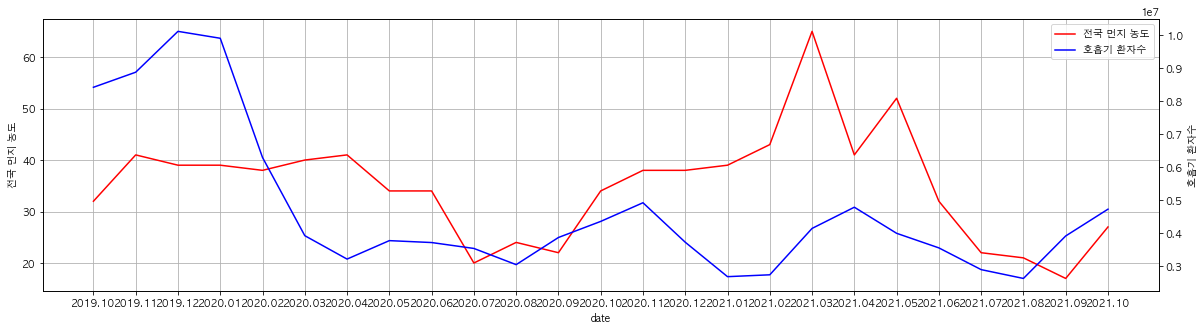

In [52]:
import matplotlib.pyplot as plt

res = dust_sick

# 꺾은선 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 5))

ax2 = ax1.twinx()
lns1 = ax1.plot(res['날짜'], res['전국 먼지 농도'], label='전국 먼지 농도', color='red')
lns2 = ax2.plot(res['날짜'], res['환자수 합계'], label='호흡기 환자수', color='blue')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

ax1.grid()
ax1.set_xlabel("date")
ax1.set_ylabel("전국 먼지 농도")
ax2.set_ylabel("호흡기 환자수")
plt.show()

### 지역별 월별 미세 먼지 농도

In [53]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

    
df = dust_sick

sido = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']

# x축
x_data = sido

dust_data = []

# 월별 지역별 미세 먼지 농도
for x in range(3, len(df.columns), 2):
    dust_data.append(df.iloc[ : , x])

dust_data_df = pd.DataFrame(dust_data)

dust_data_df.columns = ['2019.10',
 '2019.11',
 '2019.12',
 '2020.01',
 '2020.02',
 '2020.03',
 '2020.04',
 '2020.05',
 '2020.06',
 '2020.07',
 '2020.08',
 '2020.09',
 '2020.10',
 '2020.11',
 '2020.12',
 '2021.01',
 '2021.02',
 '2021.03',
 '2021.04',
 '2021.05',
 '2021.06',
 '2021.07',
 '2021.08',
 '2021.09',
 '2021.10']


dust_data_df

,2019.10,2019.11,2019.12,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,...,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10
서울 먼지 농도,31,40,42,42,41,45,44,35,36,21,...,38,48,67,42,61,33,24,22,15,27
부산 먼지 농도,27,35,35,32,34,33,36,32,27,18,...,36,37,60,37,36,26,18,19,17,23
대구 먼지 농도,27,41,42,37,38,38,39,38,35,22,...,40,41,59,42,41,35,19,21,18,26
인천 먼지 농도,35,41,40,42,37,41,39,31,32,21,...,37,46,69,42,59,36,29,22,16,28
광주 먼지 농도,35,43,33,36,32,35,38,31,31,15,...,37,40,65,39,50,29,16,17,15,25
대전 먼지 농도,29,43,40,41,38,40,41,32,34,16,...,39,42,63,41,56,31,16,18,15,27
울산 먼지 농도,27,34,33,30,31,34,36,36,32,20,...,34,35,55,37,35,28,17,20,16,22
세종 먼지 농도,32,45,46,47,43,47,44,34,37,17,...,45,47,67,42,61,31,20,21,16,29
경기 먼지 농도,37,47,47,47,44,49,47,38,41,23,...,42,52,72,46,64,37,26,25,17,31
강원 먼지 농도,28,36,37,34,36,37,39,29,35,17,...,35,39,51,38,47,24,18,19,13,19


### 지역별 월별 환자수

In [54]:
patients_data = []

# 월별 지역별 환자수
for x in range(4, len(dust_sick.columns), 2):
    patients_data.append(dust_sick.iloc[ : , x])

patients_data_df = pd.DataFrame(patients_data)

patients_data_df.columns = ['2019.10',
 '2019.11',
 '2019.12',
 '2020.01',
 '2020.02',
 '2020.03',
 '2020.04',
 '2020.05',
 '2020.06',
 '2020.07',
 '2020.08',
 '2020.09',
 '2020.10',
 '2020.11',
 '2020.12',
 '2021.01',
 '2021.02',
 '2021.03',
 '2021.04',
 '2021.05',
 '2021.06',
 '2021.07',
 '2021.08',
 '2021.09',
 '2021.10']

patients_data_df

,2019.10,2019.11,2019.12,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,...,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10
서울 환자수,1651751,1727085,1964570,1907110,1190445,770076,613213,724624,666557,634526,...,484092,482881,739601,895335,736703,641100,527742,488460,685117,793596
부산 환자수,549988,601619,684773,669359,438312,260568,206569,219152,255212,236044,...,178011,187805,278621,292809,250241,225028,186769,173103,246711,324029
대구 환자수,388517,423010,484563,482232,312377,164963,143364,141004,153099,172278,...,133667,133295,199533,259459,197542,164514,138641,135163,196045,235812
인천 환자수,476490,497904,573766,554750,338664,214611,166704,205692,187449,186371,...,137221,139307,228912,254015,215575,190924,147713,132022,207710,247765
광주 환자수,266658,273276,302958,293908,183978,124437,110084,130823,124479,100183,...,90087,87174,130952,147720,122172,110694,99363,87998,137388,157016
대전 환자수,277537,283639,320097,324808,211980,127021,103775,125045,126201,101327,...,93388,94200,128403,149012,128682,117324,94458,82531,131726,158138
울산 환자수,196465,217834,244482,235468,158530,87592,70591,81489,92532,92257,...,60255,64873,101344,116460,80295,75975,72791,62862,86641,120947
세종 환자수,65578,67979,77498,71607,44518,27063,22234,31544,33335,29882,...,22501,22311,38155,43169,38281,35484,25586,23556,37156,44908
경기 환자수,2250270,2341394,2698006,2570572,1493086,971019,793240,1016236,959275,896590,...,638840,654459,1098524,1286799,1087428,946995,724362,649952,1054770,1222209
강원 환자수,220491,227228,258753,275510,172267,106315,89072,112788,107877,106543,...,74228,75797,104030,118595,112210,95750,75403,75819,105364,125000


In [55]:
dust_data_df.index = ['서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '세종',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주']

patients_data_df.index = ['서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '세종',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주']

### 함수 4: [전국] 미세먼지 & 환자수 시각화

- input: dust_sick
- output: 전국 미세먼지 & 환자수 그래프

#### 지역별 미세먼지와 환자수 비교

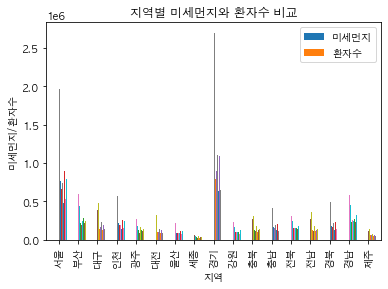

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.concat([dust_data_df, patients_data_df], axis=1)
merged_df.plot(kind='bar', width=0.8)

plt.xlabel('지역')
plt.ylabel('미세먼지/환자수')
plt.title('지역별 미세먼지와 환자수 비교')
plt.legend(['미세먼지', '환자수'])
plt.show()

### 미세먼지 농도와 지역별 환자수 데이터프레임 병합

In [57]:
import pandas as pd

patients_data_df = pd.DataFrame(patients_data)
dust_data_df = pd.DataFrame(dust_data)

#  두 데이터프레임 병합
merged_df = pd.concat([dust_data_df, patients_data_df])

In [58]:
merged_df.columns = ['2019.10',
 '2019.11',
 '2019.12',
 '2020.01',
 '2020.02',
 '2020.03',
 '2020.04',
 '2020.05',
 '2020.06',
 '2020.07',
 '2020.08',
 '2020.09',
 '2020.10',
 '2020.11',
 '2020.12',
 '2021.01',
 '2021.02',
 '2021.03',
 '2021.04',
 '2021.05',
 '2021.06',
 '2021.07',
 '2021.08',
 '2021.09',
 '2021.10']

In [59]:
merged_df = merged_df.transpose()

In [60]:
merged_df

,서울 먼지 농도,부산 먼지 농도,대구 먼지 농도,인천 먼지 농도,광주 먼지 농도,대전 먼지 농도,울산 먼지 농도,세종 먼지 농도,경기 먼지 농도,강원 먼지 농도,...,세종 환자수,경기 환자수,강원 환자수,충북 환자수,충남 환자수,전북 환자수,전남 환자수,경북 환자수,경남 환자수,제주 환자수
2019.10,31,27,27,35,35,29,27,32,37,28,...,65578,2250270,220491,271048,353295,301130,275841,384469,531581,117507
2019.11,40,35,41,41,43,43,34,45,47,36,...,67979,2341394,227228,281789,365676,313391,299858,419228,584199,122846
2019.12,42,35,42,40,33,40,33,46,47,37,...,77498,2698006,258753,311795,410038,362909,339472,486458,674959,140324
2020.01,42,32,37,42,36,41,30,47,47,34,...,71607,2570572,275510,315685,419854,365627,359138,495040,657986,139180
2020.02,41,34,38,37,32,38,31,43,44,36,...,44518,1493086,172267,209329,264102,240867,245238,332637,451946,94353
2020.03,45,33,38,41,35,40,34,47,49,37,...,27063,971019,106315,130889,165021,162072,160778,178757,254970,62404
2020.04,44,36,39,39,38,41,36,44,47,39,...,22234,793240,89072,108644,135341,138937,132105,150203,203819,60524
2020.05,35,32,38,31,31,32,36,34,38,29,...,31544,1016236,112788,127529,164798,152485,143670,154626,230141,62497
2020.06,36,27,35,32,31,34,32,37,41,35,...,33335,959275,107877,125212,166103,148443,138221,172829,244963,57878
2020.07,21,18,22,21,15,16,20,17,23,17,...,29882,896590,106543,120494,158294,145974,136593,176975,226054,63143


In [61]:
merged_df = merged_df[[ "서울 먼지 농도", '서울 환자수',
"부산 먼지 농도", '부산 환자수',
"대구 먼지 농도", '대구 환자수',
"인천 먼지 농도", '인천 환자수',
"광주 먼지 농도", '광주 환자수',
"대전 먼지 농도", '대전 환자수',
"울산 먼지 농도", '울산 환자수',
"세종 먼지 농도", '세종 환자수',
"경기 먼지 농도", '경기 환자수',
"강원 먼지 농도", '강원 환자수',
"충북 먼지 농도", '충북 환자수',
"충남 먼지 농도", '충남 환자수',
"전북 먼지 농도", '전북 환자수',
"전남 먼지 농도", '전남 환자수',
"경북 먼지 농도", '경북 환자수',
"경남 먼지 농도", '경남 환자수',
"제주 먼지 농도", '제주 환자수'
]]

In [62]:
merged_df

,서울 먼지 농도,서울 환자수,부산 먼지 농도,부산 환자수,대구 먼지 농도,대구 환자수,인천 먼지 농도,인천 환자수,광주 먼지 농도,광주 환자수,...,전북 먼지 농도,전북 환자수,전남 먼지 농도,전남 환자수,경북 먼지 농도,경북 환자수,경남 먼지 농도,경남 환자수,제주 먼지 농도,제주 환자수
2019.10,31,1651751,27,549988,27,388517,35,476490,35,266658,...,34,301130,27,275841,31,384469,30,531581,32,117507
2019.11,40,1727085,35,601619,41,423010,41,497904,43,273276,...,43,313391,35,299858,40,419228,37,584199,40,122846
2019.12,42,1964570,35,684773,42,484563,40,573766,33,302958,...,36,362909,28,339472,39,486458,33,674959,29,140324
2020.01,42,1907110,32,669359,37,482232,42,554750,36,293908,...,40,365627,31,359138,34,495040,29,657986,31,139180
2020.02,41,1190445,34,438312,38,312377,37,338664,32,183978,...,36,240867,31,245238,35,332637,32,451946,34,94353
2020.03,45,770076,33,260568,38,164963,41,214611,35,124437,...,41,162072,31,160778,36,178757,31,254970,35,62404
2020.04,44,613213,36,206569,39,143364,39,166704,38,110084,...,41,138937,34,132105,38,150203,33,203819,41,60524
2020.05,35,724624,32,219152,38,141004,31,205692,31,130823,...,34,152485,29,143670,33,154626,32,230141,36,62497
2020.06,36,666557,27,255212,35,153099,32,187449,31,124479,...,36,148443,26,138221,32,172829,29,244963,27,57878
2020.07,21,634526,18,236044,22,172278,21,186371,15,100183,...,18,145974,17,136593,18,176975,20,226054,20,63143


### 서울시 미세 먼지 농도 및 환자수 데이터프레임

In [63]:
import pandas as pd
import matplotlib.pyplot as plt


tran_merge = merged_df.iloc[ : , 0:2]
tran_merge

,서울 먼지 농도,서울 환자수
2019.10,31,1651751
2019.11,40,1727085
2019.12,42,1964570
2020.01,42,1907110
2020.02,41,1190445
2020.03,45,770076
2020.04,44,613213
2020.05,35,724624
2020.06,36,666557
2020.07,21,634526


### 함수 4: [서울] 미세먼지 & 환자수 시각화

- input: dust_sick
- output: 서울 미세먼지 & 환자수 그래프

In [75]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from sklearn.preprocessing import MinMaxScaler


dust_scaler = MinMaxScaler()
dust_normalized = np.around(dust_scaler.fit_transform(np.array(tran_merge['서울 먼지 농도']).reshape(-1, 1)).flatten(), decimals=2)

patient_scaler = MinMaxScaler()
patient_normalized = np.around(patient_scaler.fit_transform(np.array(tran_merge['서울 환자수']).reshape(-1, 1)).flatten(), decimals=2)

# Create the Bar chart object
bar_chart = Bar()

# Add the data to the Bar chart object
bar_chart.add_xaxis(list(tran_merge.index))
bar_chart.add_yaxis("서울 먼지 농도", list(dust_normalized))
bar_chart.add_yaxis("서울 환자수", list(patient_normalized))

# Set the options for the Bar chart object
bar_chart.set_global_opts(title_opts=opts.TitleOpts(title="서울시 기간별 먼지 농도 및 환자수 추이"), 
                          xaxis_opts=opts.AxisOpts(name="날짜"),
                          yaxis_opts=opts.AxisOpts(name="미세먼지 농도 및 환자수"))

# Render the chart to an HTML file
# bar_chart.render("dust_sick_double_graph_seoul.html")
bar_chart.render_notebook()

### 함수 4: [연령] 미세먼지 & 환자수 시각화

- input: dust_sick
- output: 청년/노년 미세먼지 & 환자수 그래프

In [65]:
import pandas as pd
import numpy as np

"""
dataframe_path는 커스텀이 필요함 !
본인이 pickle file 다운로드 한 경로로 설정할 것
"""

dataframe_path = "./data/age.pkl"
with open(dataframe_path,"rb") as f:
    df = pickle.load(f)

In [66]:
df.reset_index(drop=True,inplace=True)
young = pd.concat([df.iloc[4:6,:],df.iloc[14:16,:]]).groupby(['나이']).sum()
young.loc['청년_총계'] = young.sum().values

old = pd.concat([df.iloc[8:10,:],df.iloc[18:20,:]]).groupby(['나이']).sum()
old.loc['노년_총계'] = old.sum()

#### 청년층 그래프

In [76]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from sklearn.preprocessing import MinMaxScaler

# Create the first bar chart object
bar_chart1 = Bar()
bar_chart1.add_xaxis(list(res.날짜))
dust_data = list(res['전국 먼지 농도'])
dust_scaler = MinMaxScaler()
dust_normalized = np.around(dust_scaler.fit_transform(np.array(dust_data).reshape(-1, 1)).flatten(), decimals=2)
bar_chart1.add_yaxis('전국 먼지 농도', list(dust_normalized))

# Create the second bar chart object
bar_chart2 = Bar()
bar_chart2.add_xaxis(list(res['전국 먼지 농도']))
patient_data = list(young.loc['청년_총계'].values)
patient_scaler = MinMaxScaler()
patient_normalized = np.around(patient_scaler.fit_transform(np.array(patient_data).reshape(-1, 1)).flatten(), decimals=2)
bar_chart2.add_yaxis('청년 호흡기 환자수', list(patient_normalized))

# Combine the two bar charts into a single chart object
combo_chart = bar_chart1.overlap(bar_chart2)

# Set the title and other options for the chart
combo_chart.set_global_opts(title_opts=opts.TitleOpts(title="청년층 날짜별 미세먼지/호흡기 환자 수 분포"),
                            xaxis_opts=opts.AxisOpts(name="날짜"),
                            yaxis_opts=opts.AxisOpts(name="미세먼지 농도/환자 수"))

# Render the chart to an HTML file
# combo_chart.render("young_dust_sick.html")
combo_chart.render_notebook()

#### 노년층 그래프

In [77]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from sklearn.preprocessing import MinMaxScaler
# Create the first bar chart object
bar_chart1 = Bar()
bar_chart1.add_xaxis(list(res.날짜))
dust_data = list(res['전국 먼지 농도'])
dust_scaler = MinMaxScaler()
dust_normalized = np.around(dust_scaler.fit_transform(np.array(dust_data).reshape(-1, 1)).flatten(), decimals=2)
bar_chart1.add_yaxis('전국 먼지 농도', list(dust_normalized))

# Create the second bar chart object
bar_chart2 = Bar()
bar_chart2.add_xaxis(list(res['전국 먼지 농도']))
patient_data = list(old.loc['노년_총계'].values)
patient_scaler = MinMaxScaler()
patient_normalized = np.around(patient_scaler.fit_transform(np.array(patient_data).reshape(-1, 1)).flatten(), decimals=2)
bar_chart2.add_yaxis('노년 호흡기 환자수', list(patient_normalized))

# Combine the two bar charts into a single chart object
combo_chart = bar_chart1.overlap(bar_chart2)

# Set the title and other options for the chart
combo_chart.set_global_opts(title_opts=opts.TitleOpts(title="노년층 날짜별 미세먼지/호흡기 환자 수 분포"),
                            xaxis_opts=opts.AxisOpts(name="날짜"),
                            yaxis_opts=opts.AxisOpts(name="미세먼지 농도/ 환자 수"))

# Render the chart to an HTML file
# combo_chart.render("old_dust_sick.html")
combo_chart.render_notebook()

#### 청년층 & 노년층 비교

- 청년층: 20~39세
- 노년층: 60~79세

In [69]:
with open("./data/age.pkl", 'rb') as f :
    age = pickle.load(f)

with open("./data/final.pkl", 'rb') as d :
    data = pickle.load(d)


datatotal = data.iloc[:,1:3]

agesum= age.set_index("나이").groupby(['나이']).sum()
age_young=agesum.iloc[2:4,:]
age_old = agesum.iloc[6:8,:]
age_young.loc['청년총합'] = agesum.iloc[2:4,:].sum()
age_old.loc['노년총합'] = agesum.iloc[6:8,:].sum()

age_old=age_old.transpose()
age_young=age_young.transpose()


/var/folders/m8/y2sdpn5d07dd0k04zhlpbqf00000gn/T/ipykernel_4794/3254458243.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_young.loc['청년총합'] = agesum.iloc[2:4,:].sum()
/var/folders/m8/y2sdpn5d07dd0k04zhlpbqf00000gn/T/ipykernel_4794/3254458243.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_old.loc['노년총합'] = agesum.iloc[6:8,:].sum()


In [70]:
age_young

나이,20_29세,30_39세,청년총합
2019.10,756666,1040549,1797215
2019.11,758461,1108022,1866483
2019.12,846759,1265629,2112388
2020.01,959203,1252273,2211476
2020.02,565687,772394,1338081
2020.03,348618,459752,808370
2020.04,268180,350249,618429
2020.05,303814,413362,717176
2020.06,276648,388001,664649
2020.07,267242,358042,625284


In [71]:
age_old

나이,60_69세,70_79세,노년총합
2019.10,782383,522482,1304865
2019.11,864491,554181,1418672
2019.12,1040202,644749,1684951
2020.01,1177132,754343,1931475
2020.02,773532,537865,1311397
2020.03,524650,399986,924636
2020.04,417922,336419,754341
2020.05,384826,303445,688271
2020.06,351489,281360,632849
2020.07,343172,278547,621719


In [72]:
normalized_total = datatotal
normalized_young = age_young.apply(lambda x :  x // 15000, axis=0, result_type='expand')
normalized_old = age_old.apply(lambda x:  x // 15000, axis=0, result_type='expand')

aa=normalized_old.reset_index() 
bb=normalized_young.reset_index()

aa.columns = [['날짜', '60_69세', '70_79세', '노년총합']]
bb.columns = [['날짜', '20_29세', '30_39세', '청년총합']]

normalized_old = aa
normalized_young = bb

#### 기간별 미세먼지 농도와 청년층과 노년층의 환자 수 비교 그래프

In [79]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Line

# 데이터 설정(소수점 두 자릿수까지)
x_data = normalized_young.iloc[:,0].values.tolist()
y_axis1 = np.around(normalized_young.iloc[:,2].values, 2).tolist()
y_axis2= np.around(normalized_old.iloc[:,2].values, 2).tolist()
y_axis3 = np.around(normalized_total.iloc[:,0].values, 2).tolist()

# 그래프 생성
bar = Bar()
line = Line()

# x, y 데이터 추가
line.add_xaxis(x_data)
line.add_yaxis("Air pollution", y_axis3)

bar.add_xaxis(x_data)
bar.add_yaxis("청년", y_axis1)
bar.add_yaxis("노년", y_axis2)

# 그래프 옵션 추가
bar.set_global_opts(
    title_opts=opts.TitleOpts(title="Young & Old feat.Air pollution"),
    xaxis_opts=opts.AxisOpts(name="날짜"),
    yaxis_opts=opts.AxisOpts(name="환자비율",)
)


line.set_global_opts(
    yaxis_opts=opts.AxisOpts(name="오염비율",)    
)

# 그래프 렌더링
line.overlap(bar)
# line.render("old_young_dust_graph.html")
line.render_notebook()

### 함수 4: 상관관계 지수

- input: dust_sick
- output: corr(상관관계 지수)

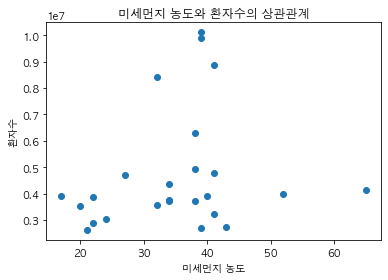

상관계수:  0.19710722986164894


In [74]:
dust_corr = data.iloc[  : , :2 ]
sick_corr = patients_num.iloc[ : , : 2]

import numpy as np
import matplotlib.pyplot as plt

sick_corr = sick_corr.applymap(lambda x : x.replace(',','') if type(x) == str else x)

sick_corr = sick_corr .set_index("날짜").astype(int).reset_index()

# 상관관계 계산
corr = np.corrcoef(dust_corr["전국 먼지 농도"], sick_corr["환자수 합계"])[0, 1]

# 시각화
plt.scatter(dust_corr["전국 먼지 농도"], sick_corr["환자수 합계"])
plt.title("미세먼지 농도와 환자수의 상관관계")
plt.xlabel("미세먼지 농도")
plt.ylabel("환자수")
plt.show()

print("상관계수: ", corr)

### Conclusion

- 코로나 발생 이후로 호흡기 계통 환자수가 급감
- 청년층 환자수 > 노년층 환자수
- 미세먼지와 호흡기 계통 질환의 상관 관계는 크게 없음
- 따라서, 마스크 착용보다는 개인 위생 관리가 더 중요하다고 판단됨.

- __**다만... 다음과 같은 문제점 때문에 신뢰성 하락**__

    데이터 양 부족, 타겟의 범주가 큼
    -> 따라서, 미세먼지와 질환 간 상관관계 분석에 대한 정확성 고려 필요(추가 분석 필요)